In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [16]:
G=(lambda x1,x2: np.log(x1**2+x2**2)-np.sin(x1*x2)-np.log(2)-np.log(np.pi), \
   lambda x1,x2: np.exp(x1-x2)+np.cos(x1*x2))

In [17]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1])
        
    return v

In [18]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
        
        
    return J.T

In [20]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2


In [19]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [21]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        
        if it%500 == 0:
            
            #print(it,d)
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

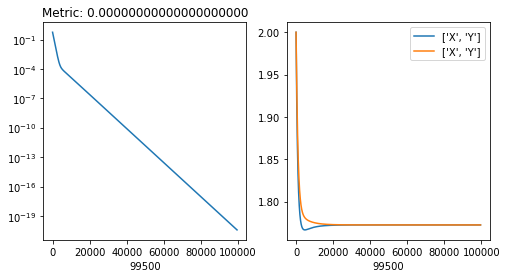

 Entrenamiento no completado 


In [22]:
xsol,it,F,R = GetSolve(G,[2,2],lr=1e-4)

In [23]:
def NewtonRaphson(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        print(diff)
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d

In [25]:
r,it,distancias = NewtonRaphson(G,[2,2])
print(r,it)


[-0.09899834 -0.3260053 ]
[-0.06996901  0.07324917]
[-0.03559881  0.00465102]
[-0.01071605  0.01860121]
[-0.00817261 -0.00475954]
[-0.00098126  0.00842107]
[-0.00268303 -0.00489845]
[0.00062404 0.00503654]
[-0.00126521 -0.00377184]
[0.00071288 0.00336175]
[-0.00075978 -0.00272138]
[0.00055923 0.00232576]
[-0.00050641 -0.00192779]
[0.00040567 0.00162668]
[-0.00034981 -0.00135821]
[0.000288   0.00114147]
[-0.0002444  -0.00095533]
[0.00020313 0.00080179]
[-0.00017137 -0.00067161]
[0.00014297 0.00056338]
[-0.00012031 -0.00047207]
[0.00010056 0.0003959 ]
[-8.45085896e-05 -3.31794712e-04]
[7.07033705e-05 2.78223906e-04]
[-5.93719572e-05 -2.33195759e-04]
[4.97044352e-05 1.95529089e-04]
[-4.17170449e-05 -1.63894956e-04]
[3.49390041e-05 1.37414846e-04]
[-2.93141655e-05 -1.15187862e-04]
[2.45584184e-05 9.65737894e-05]
[-2.05997792e-05 -8.09553081e-05]
[1.72612813e-05 6.78714454e-05]
[-1.44764466e-05 -5.68960625e-05]
[1.21320377e-05 4.76997861e-05]
[-1.01735228e-05 -3.99869137e-05]
[8.52680161e-0

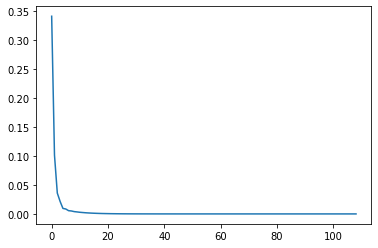

In [28]:
plt.plot(distancias)


In [43]:
G1=(lambda x1,x2,x3: 6*x1-2*np.cos(x2*x3)-1., \
    lambda x1,x2,x3: 9*x2+np.sqrt(x1**2+np.sin(x3)+1.06)+0.9, \
    lambda x1,x2,x3: 60*x3+3*np.exp(-x1*x2)+10*np.pi-3.)


In [30]:
def GetVectorF1(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [41]:
def GetJacobian1(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
        J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [45]:
def GetMetric1(G,r):
    v = GetVectorF1(G,r)
    return 0.5*np.linalg.norm(v)**2


In [34]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y','Z']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [49]:
def GetSolve1(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric1(G,r)
        
        J = GetJacobian1(G,r)
        
        GVector = GetVectorF1(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric1(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        
        if it%500 == 0:
            
            #print(it,d)
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

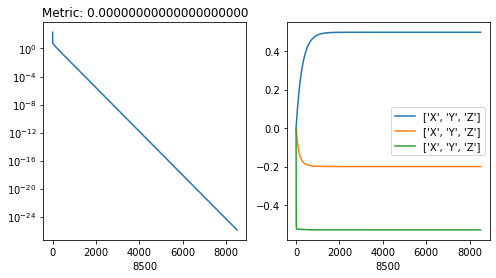

 Entrenamiento completo  0.0 iteraciones 8536


In [50]:
xsol,it,F,R = GetSolve1(G1,[0,0,0],lr=1e-4)

In [53]:
def NewtonRaphson1(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF1(G,r)
        J = GetJacobian1(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        print(diff)
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d

In [55]:
r1,it1,distancias1 = NewtonRaphson1(G1,[0,0,0])
print(r1,it1)


[ 0.5        -0.21439589 -0.52186344]
[-0.00238106  0.01288117 -0.00749826]
[0.00024297 0.00205967 0.00047268]
[ 2.87757327e-04 -1.13360672e-04  7.14204832e-05]
[ 2.08603051e-07 -3.95328587e-05 -7.08199208e-06]
[-5.19275201e-06  1.33730455e-06 -1.42170847e-06]
[-9.77612319e-08  7.39309225e-07  1.02405968e-07]
[ 9.21706162e-08 -1.08171067e-08  2.75706463e-08]
[ 3.43583895e-09 -1.35697276e-08 -1.35376188e-09]
[-1.60520347e-09 -4.97944741e-11 -5.23240118e-10]
[-9.11919984e-11  2.44574361e-10  1.50240931e-11]
[2.73883694e-11 5.32510147e-12 9.73710002e-12]
[ 0.49814468 -0.1996059  -0.52882598] 12


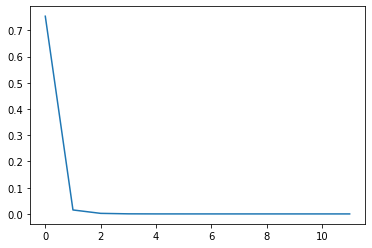

In [56]:
plt.plot(distancias1)